In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pymks
from pymks.datasets.cahn_hilliard_simulation import CahnHilliardSimulation
from pymks.tools import draw_concentrations
from pymks.tools import draw_coeff
from pymks.bases import LegendreBasis
from pymks import MKSLocalizationModel
import time

/home/apaar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/apaar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
def ch_test(length=51, time_steps = 10, seed = 99, dt =1e-1, gamma = 1., n_samples=1):
    np.random.seed(seed)
    size=(length, length)
    phi0 = np.random.normal(0, 1e-1, ((n_samples,) + size))
    phi_sim = phi0.copy()
    ch_sim = CahnHilliardSimulation(dt=dt)
    for steps in range(time_steps):
        ch_sim.run(phi_sim)
        phi_sim = ch_sim.response
    return phi0, phi_sim

def error(X, Y):
    n = X.shape[0]*X.shape[1]
    return (np.sum((X-Y)**2))

In [28]:
length     = 101 # size of domain
time_steps = 1 # Simulation time
seed       = 101 # seed for random no, generator for geenrating the initial microstructure
dt         = 1e-2 #simulation timestep
gamma      = 1. #gamma parameter value
n_samples = 200 # no. of samples to be 
X, y = ch_test(length, time_steps, seed, dt, gamma, n_samples)

In [10]:
X, y = ch_test(length, time_steps, seed, dt, gamma, n_samples)

In [11]:
leg_basis = LegendreBasis(6, [-1, 1])
leg_model = MKSLocalizationModel(basis=leg_basis)
leg_model.fit(X, y)

In [29]:
length     = 101 # size of domain
time_steps = 1 # Simulation time
seed       = 99 # seed for random no, generator for geenrating the initial microstructure
dt         = 1e-2 #simulation timestep
gamma      = 1. #gamma parameter value
test_samples = 50 # no. of training samples to be generated

In [30]:
%timeit X_test, y_test=ch_test(length, time_steps, seed, dt, gamma, test_samples)
X_test, y_test=ch_test(length, time_steps, seed, dt, gamma, test_samples)

1 loop, best of 3: 683 ms per loop


In [33]:
%timeit y_predict = leg_model.predict(y_test)
y_predict = leg_model.predict(X_test)

1 loop, best of 3: 979 ms per loop


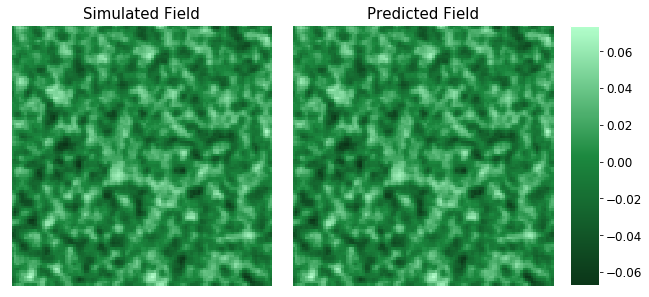

In [34]:
draw_concentrations([y_test[0], y_predict[0]], ['Simulated Field', 'Predicted Field'])

In [51]:
sim_steps = 1
pred_steps = 10
phi_sim = X_test.copy()
phi_sim1 = X_test.copy()
phi_pred = X_test.copy()

In [54]:
for steps in range(pred_steps):
    phi_pred = leg_model.predict(phi_pred)

In [55]:
print(10*dt)
ch_sim = CahnHilliardSimulation(dt=10*dt)
for steps in range(sim_steps):
    ch_sim.run(phi_sim)
    phi_sim = ch_sim.response

0.1


Below, I am comparing two microstructures - 
They are resultant from forward time stepping using spectral solver and MKS predict respectively.

Keeping the initial microstructure same in both the cases;
In case of Simulated field I carried out one forward stepping with dt = 1e-1,
whereas in case of the predicted field I carried out 10 predict steps consecutive steps, using 
influence kernel generated for dt=1e-2 response.

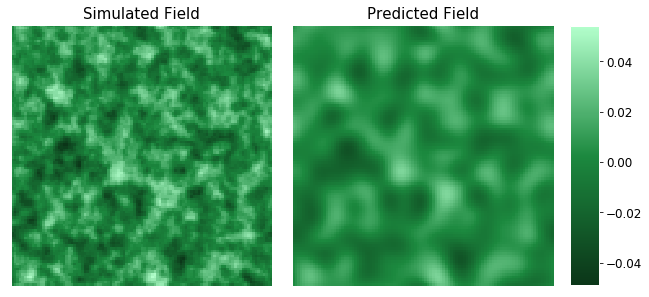

0.842981125416


In [60]:
draw_concentrations([phi_sim[0], phi_pred[0]], ['Simulated Field', 'Predicted Field'])
print(error(phi_sim[0], phi_pred[0]))

In [52]:
ch_sim = CahnHilliardSimulation(dt=dt)
for steps in range(pred_steps):
    ch_sim.run(phi_sim1)phi_predict = leg_model.predict(X_test)
    phi_sim1 = ch_sim.response

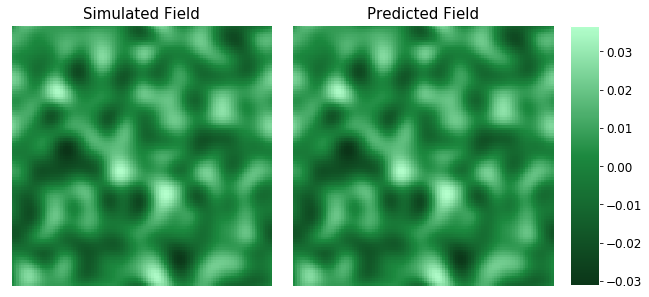

5.17081757835e-26


In [58]:
draw_concentrations([phi_sim1[0], phi_pred[0]], ['Simulated Field', 'Predicted Field'])
print(error(phi_sim1[0], phi_pred[0]))

In [72]:
steps = 500
phi_sim = X_test.copy()
phi_pred = X_test.copy()
errs = np.zeros(steps)

In [73]:
ch_sim = CahnHilliardSimulation(dt=dt)
for step in range(steps):
    ch_sim.run(phi_sim)
    phi_sim = ch_sim.response
    phi_pred = leg_model.predict(phi_pred)
    errs[step] = error(phi_sim[0], phi_pred[0])
    print(step, errs[step])

0 1.63256536486e-27
1 2.97636488905e-27
2 5.60197821583e-27
3 9.23467699029e-27
4 1.38704423719e-26
5 1.94696779955e-26
6 2.61128123308e-26
7 3.36630966175e-26
8 4.22014062113e-26
9 5.17081757835e-26
10 6.22100959213e-26
11 7.36942875557e-26
12 8.62111617095e-26
13 9.95267419547e-26
14 1.1390075873e-25
15 1.29239135461e-25
16 1.45561199646e-25
17 1.62797223882e-25
18 1.80998107881e-25
19 2.0026792688e-25
20 2.20366445678e-25
21 2.41544231154e-25
22 2.6358619866e-25
23 2.86537239083e-25
24 3.10509997982e-25
25 3.35584974882e-25
26 3.61398439067e-25
27 3.8848019575e-25
28 4.16389014777e-25
29 4.45418195168e-25
30 4.75286302938e-25
31 5.06037331816e-25
32 5.37949096793e-25
33 5.70691214036e-25
34 6.04417381016e-25
35 6.39219047691e-25
36 6.7498932585e-25
37 7.11858258065e-25
38 7.49413798247e-25
39 7.88096421527e-25
40 8.27741306613e-25
41 8.68448856255e-25
42 9.10224199623e-25
43 9.52494900137e-25
44 9.96092180072e-25
45 1.04041680592e-24
46 1.08566843904e-24
47 1.13193854331e-24
48 1.17

380 7.3457151058e-23
381 7.38555764067e-23
382 7.42553812847e-23
383 7.4656358683e-23
384 7.5059462104e-23
385 7.54646568016e-23
386 7.5866456656e-23
387 7.62716413811e-23
388 7.667867823e-23
389 7.70896310033e-23
390 7.75002050872e-23
391 7.79114496912e-23
392 7.83247524474e-23
393 7.87386884008e-23
394 7.91552781595e-23
395 7.95727992629e-23
396 7.99909637728e-23
397 8.04095240128e-23
398 8.08312909912e-23
399 8.12563890304e-23
400 8.16825456828e-23
401 8.21090809037e-23
402 8.25349479495e-23
403 8.2962990271e-23
404 8.33909522136e-23
405 8.38208387636e-23
406 8.4251851183e-23
407 8.46809004903e-23
408 8.51135760088e-23
409 8.55492740965e-23
410 8.59848363673e-23
411 8.64233993402e-23
412 8.6857761942e-23
413 8.72995827788e-23
414 8.77397211419e-23
415 8.81810428496e-23
416 8.86232413631e-23
417 8.90690448384e-23
418 8.95159490613e-23
419 8.99623508976e-23
420 9.04123174339e-23
421 9.08632759987e-23
422 9.13139166136e-23
423 9.17677973617e-23
424 9.22193464759e-23
425 9.26716248622e-

In [74]:
def fplot(x,y):
    plt.plot(x, y)
    plt.show()

In [77]:
x = np.arange(steps)+1

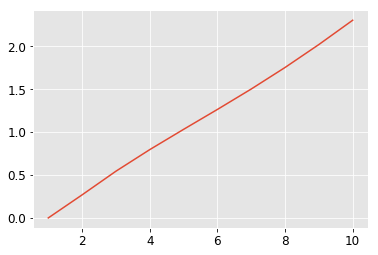

In [138]:
fplot(x, np.log10(errs/np.min(errs)))

In [82]:
length     = 101 # size of domain
time_steps = 50 # Simulation time
seed       = 101 # seed for random no, generator for geenrating the initial microstructure
dt         = 1e-2 #simulation timestep
gamma      = 1. #gamma parameter value
n_samples = 200 # no. of samples to be generated

In [83]:
X, y = ch_test(length, time_steps, seed, dt, gamma, n_samples)

In [84]:
leg_basis = LegendreBasis(6, [-1, 1])
leg_model = MKSLocalizationModel(basis=leg_basis)
leg_model.fit(X, y)

In [92]:
length     = 101 # size of domain
time_steps = 50 # Simulation time
seed       = 99 # seed for random no, generator for geenrating the initial microstructure
dt         = 1e-2 #simulation timestep
gamma      = 1. #gamma parameter value
n_samples  = 1 # no. of samples to be generated

In [93]:
steps = 10
errs = np.zeros(steps)
for step in range(steps):    
    X_test, y_test=ch_test(length, (step+1)*time_steps, seed, dt, gamma, n_samples)
    y_pred = X_test.copy()
    for i in range(step+1):
        y_pred = leg_model.predict(y_pred)
    errs[step] = error(y_pred, y_test)
    print(errs[step])

5.43085340014e-07
1.00835214032e-06
1.90157680226e-06
3.39265270465e-06
5.84181159694e-06
9.96562202736e-06
1.72330411271e-05
3.07102586874e-05
5.68349396526e-05
0.000109100695098


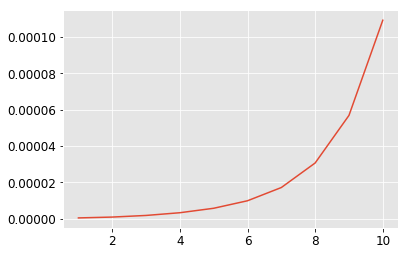

In [94]:
x = np.arange(steps)+1
fplot(x, errs)

In [99]:
print(time_steps)

50


In [124]:
%%time
i=35
seed = 98
time_steps = 50
n_samples=1
X_test, y_test=ch_test(length, i*time_steps, seed, dt, gamma, n_samples)

CPU times: user 23.1 s, sys: 20 ms, total: 23.1 s
Wall time: 23.1 s


In [132]:
X_t, y_t=ch_test(length, time_steps, seed, dt, gamma, n_samples)

In [131]:
print(i)
print(X_test.shape)
phi0 = X_test.copy()

35
(1, 101, 101)


In [130]:
%%time
ch_sim = CahnHilliardSimulation(dt=dt)
phi = X_test.copy()
for steps in range(1750):
    ch_sim.run(phi)
    phi = ch_sim.response

CPU times: user 23.5 s, sys: 24 ms, total: 23.5 s
Wall time: 23.5 s


In [126]:
%%time
y_pred = X_test.copy()
for j in range(i):
    print(j)
    y_pred = leg_model.predict(y_pred)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
CPU times: user 688 ms, sys: 0 ns, total: 688 ms
Wall time: 689 ms


Prediction exceeds domain limits at t = 36

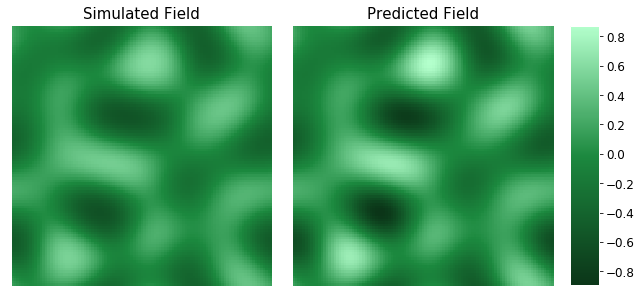

45.6379334281


In [127]:
draw_concentrations([y_test[0], y_pred[0]], ['Simulated Field', 'Predicted Field'])
print(error(y_test[0], y_pred[0]))

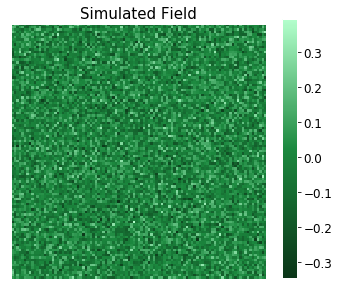

In [136]:
draw_concentrations([X_t[0]], ['Simulated Field'])

In [157]:
%%time
length     = 101 # size of domain
time_steps = 10 # Simulation time
seed       = 101 # seed for random no, generator for geenrating the initial microstructure
dt         = 1e-3 #simulation timestep
gamma      = 1. #gamma parameter value
n_samples  = 200 # no. of samples to be generated
X, y = ch_test(length, time_steps, seed, dt, gamma, n_samples)

CPU times: user 26.5 s, sys: 8 ms, total: 26.5 s
Wall time: 26.5 s


In [158]:
%%time
leg_basis = LegendreBasis(6, [-1, 1])
leg_model = MKSLocalizationModel(basis=leg_basis)
leg_model.fit(X, y)

CPU times: user 6.19 s, sys: 848 ms, total: 7.04 s
Wall time: 5.79 s


In [159]:
%%time
length     = 101 # size of domain
time_steps = 10 # Simulation time
seed       = 99 # seed for random no, generator for geenrating the initial microstructure
dt         = dt #simulation timestep
gamma      = 1. #gamma parameter value
n_samples  = 10 # no. of samples to be generated
X_test, y_test = ch_test(length, time_steps, seed, dt, gamma, n_samples)

CPU times: user 1.47 s, sys: 0 ns, total: 1.47 s
Wall time: 1.47 s


Single long Cahn Hilliard Step

In [160]:
%%time
ch_sim = CahnHilliardSimulation(dt=10*dt)
sim_steps = 1
X_long = X_test.copy()
for step in range(sim_steps):
    ch_sim.run(X_long)
    X_long = ch_sim.response

CPU times: user 144 ms, sys: 0 ns, total: 144 ms
Wall time: 145 ms


In [161]:
%%time
ch_sim = CahnHilliardSimulation(dt=dt)
sim_steps = 10
X_short = X_test.copy()
for step in range(sim_steps):
    ch_sim.run(X_short)
    X_short = ch_sim.response

CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 1.34 s


In [162]:
X_ground = y_test.copy()

In [163]:
%%time
pred_steps = 1
X_pred = X_test.copy()
for step in range(pred_steps):
    X_pred = leg_model.predict(X_pred)

CPU times: user 212 ms, sys: 0 ns, total: 212 ms
Wall time: 212 ms


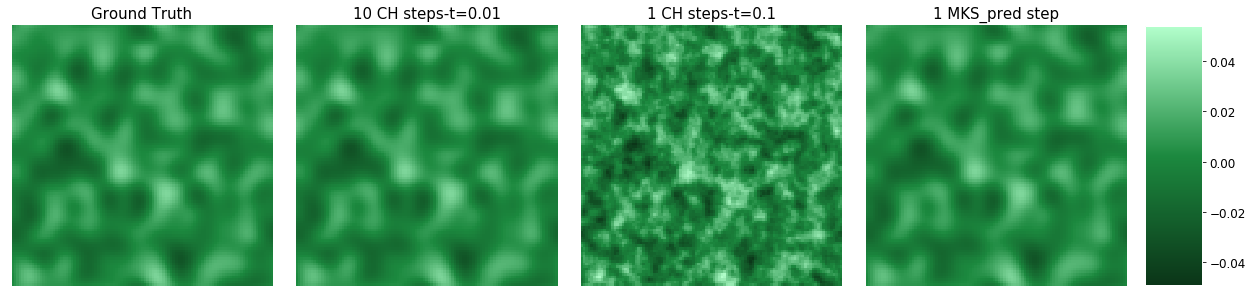

In [151]:
draw_concentrations([X_ground[0], X_short[0], X_long[0], X_pred[0]], ['Ground Truth', '10 CH steps-t=0.01', '1 CH steps-t=0.1', '1 MKS_pred step'])

In [154]:
print(error(X_ground[0], X_short[0]))
print(error(X_ground[0], X_long[0]))
print(error(X_ground[0], X_pred[0]))

0.0
0.842981125416
4.71887586369e-09


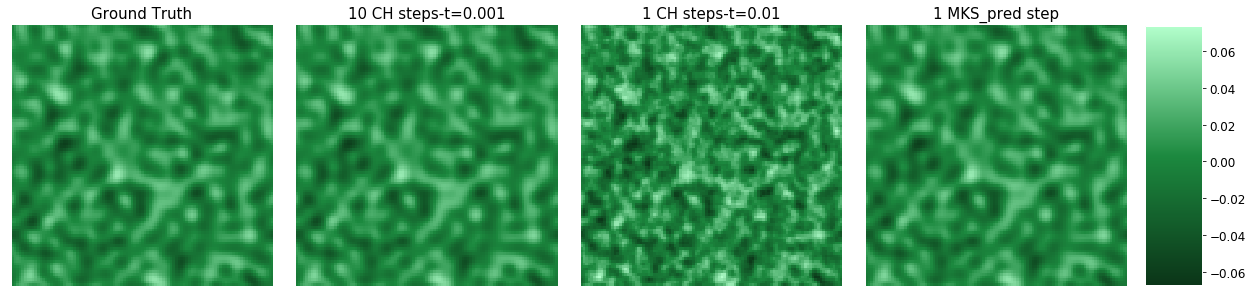

In [164]:
draw_concentrations([X_ground[0], X_short[0], X_long[0], X_pred[0]], ['Ground Truth', '10 CH steps-t=0.001', '1 CH steps-t=0.01', '1 MKS_pred step'])

In [165]:
print(error(X_ground[0], X_short[0]))
print(error(X_ground[0], X_long[0]))
print(error(X_ground[0], X_pred[0]))

0.0
0.855807796318
7.3420921219e-09


In [5]:
length     = 51 # size of domain
time_steps = 50 # Simulation time
seed       = 101 # seed for random no, generator for geenrating the initial microstructure
dt         = 1e-2 #simulation timestep
gamma      = 1. #gamma parameter value
n_samples  = 200 # no. of samples to be 
X_train, y_train = ch_test(length, time_steps, seed, dt, gamma, n_samples)